In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## data = pd.read_csv('Example-bank-data.csv')
data

In [19]:
new_data = data.copy()
new_data['y'] = new_data['y'].map({'yes':1, 'no':0})

In [20]:
new_data

,Unnamed: 0,duration,y
0,0,117,0
1,1,274,1
2,2,167,0
3,3,686,1
4,4,157,0
...,...,...,...
513,513,204,0
514,514,806,1
515,515,290,0
516,516,473,1


In [21]:
y = new_data['y']
x1 = new_data['duration']

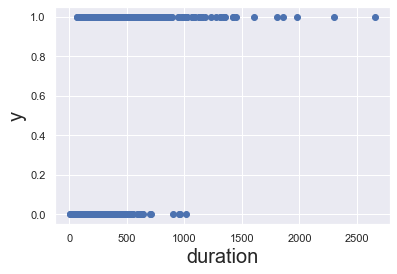

In [22]:
plt.scatter(x1,y)
plt.xlabel('duration',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.show()

In [28]:
x =sm.add_constant(x1)
reg_log = sm.Logit(y,x).fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1)/(1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,reg_log.params[0],reg_log.params[1]))
x_sorted = np.sort(np.array(x1))

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


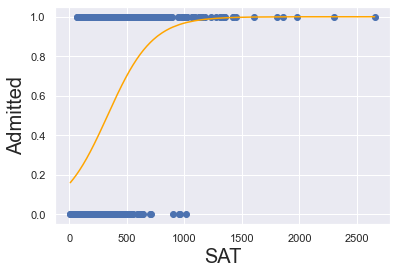

In [29]:
plt.scatter(x1,y,color = 'C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted,f_sorted,c='orange')
plt.show()

In [25]:
reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Mar 2022   Pseudo R-squ.:                  0.2121
Time:                        12:19:46   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

In [26]:
np.exp(0.0051)

1.005113027136717

In [33]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
reg_log.predict()

array([0.25, 0.43, 0.30, 0.86, 0.29, 0.26, 0.22, 0.17, 0.87, 0.32, 0.55,
       0.23, 0.30, 0.39, 0.35, 0.49, 0.29, 0.25, 0.51, 0.83, 0.84, 0.59,
       0.46, 0.40, 0.45, 0.21, 0.42, 0.42, 0.58, 0.26, 0.18, 0.26, 0.86,
       0.43, 0.29, 0.33, 0.98, 0.22, 1.00, 0.63, 0.26, 0.49, 0.31, 0.28,
       0.29, 0.25, 0.20, 0.30, 0.31, 0.47, 0.87, 0.20, 0.22, 0.29, 0.26,
       0.49, 0.28, 0.20, 0.89, 0.54, 0.24, 0.25, 0.90, 0.40, 0.51, 0.46,
       0.28, 0.30, 0.87, 0.24, 0.18, 0.37, 0.47, 0.38, 0.54, 0.26, 0.41,
       0.57, 0.29, 0.21, 0.34, 0.43, 0.30, 0.46, 0.41, 0.97, 0.30, 0.53,
       0.40, 0.23, 0.36, 0.22, 0.37, 0.32, 0.77, 0.81, 0.80, 0.20, 0.98,
       0.30, 0.93, 0.34, 0.89, 0.41, 0.50, 0.50, 0.42, 0.35, 0.42, 0.52,
       0.54, 0.25, 0.31, 0.21, 0.74, 0.18, 0.25, 0.88, 0.60, 0.48, 0.23,
       0.17, 0.40, 0.99, 0.48, 0.96, 0.36, 0.59, 0.34, 0.42, 0.29, 0.33,
       0.48, 0.90, 0.46, 0.68, 0.57, 0.43, 0.43, 0.31, 0.26, 0.23, 0.84,
       0.44, 0.84, 0.65, 0.38, 0.26, 1.00, 0.26, 0.

In [35]:
np.array(new_data['y'])


array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [37]:
reg_log.pred_table()

array([[204.00, 55.00],
       [104.00, 155.00]])

In [41]:
cm_df =pd.DataFrame(reg_log.pred_table())
cm_df.columns = ['Prediction 0', 'Prediction 1']
cm_df =cm_df.rename(index ={0:'Actual 0', 1: 'Actual 1'})
cm_df

,Prediction 0,Prediction 1
Actual 0,204.0,55.0
Actual 1,104.0,155.0


In [47]:
cm= np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.693050193050193